# AB TESTING FOR AN AD CAMPAIGN

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)

## Exploring the Dataset

In [2]:
df = pd.read_excel('AB Test.xlsx')

In [3]:
df.head(10)

,group,action
0,experiment,view
1,control,view
2,control,view and click
3,control,view and click
4,control,view
5,control,view
6,control,view
7,control,view
8,control,view
9,control,view and click


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3757 entries, 0 to 3756
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   group   3757 non-null   object
 1   action  3757 non-null   object
dtypes: object(2)
memory usage: 58.8+ KB


In [7]:
df['group'].value_counts()

experiment    1881
control       1876
Name: group, dtype: int64

In [8]:
df['action'].value_counts()

view              3082
view and click     675
Name: action, dtype: int64

## Calculating and analysing the Click-Through Rates for both groups

In [19]:
control_df = df.query('group=="control"')
print (control_df)

control_ctr = control_df.query('action=="view and click"').index.nunique()/control_df.index.nunique()
control_ctr

        group          action
1     control            view
2     control  view and click
3     control  view and click
4     control            view
5     control            view
...       ...             ...
3746  control            view
3749  control            view
3750  control            view
3752  control            view
3754  control            view

[1876 rows x 2 columns]


0.19349680170575692

In [13]:
experiment_df = df.query('group=="experiment"')
experiment_df

experiment_ctr = experiment_df.query('action=="view and click"').index.nunique()/experiment_df.index.nunique()
experiment_ctr

0.16586921850079744

In [14]:
diff = experiment_ctr - control_ctr
diff

-0.027627583204959477

## Creating Sample Distribution through Bootstrapping

In [17]:
#Bootstapping
differences = []
size = df.shape[0]
for i in range(10000):
    sample = df.sample(size, replace = True)
    control_df = sample.query('group=="control"')

    control_ctr = control_df.query('action=="view and click"').index.nunique()/control_df.index.nunique()
    
    experiment_df = sample.query('group=="experiment"')

    experiment_ctr = experiment_df.query('action=="view and click"').index.nunique()/experiment_df.index.nunique()

    differences.append(experiment_ctr - control_ctr)

    

In [20]:
df.sample(size, replace=True)

,group,action
86,experiment,view and click
3555,experiment,view
2132,control,view
2744,experiment,view
313,control,view
...,...,...
3068,experiment,view
3659,control,view
2017,experiment,view
2978,control,view and click


## Evaluating the null hypothesis and drawing conclusions



### Null Hypothesis:

H0: New Ad's CTR <= Old Ad's CTR

### Alternative Hypothesis:
H1: New Ad's CTR > Old Ad's CTR

(array([  22.,  140.,  664., 1721., 2755., 2632., 1465.,  503.,   89.,
           9.]),
 array([-0.06209659, -0.05504038, -0.04798418, -0.04092797, -0.03387176,
        -0.02681555, -0.01975934, -0.01270314, -0.00564693,  0.00140928,
         0.00846549]),
 <BarContainer object of 10 artists>)

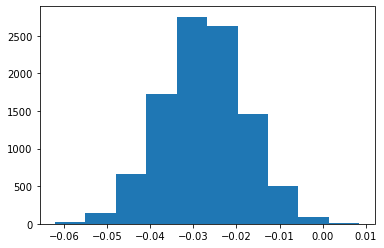

In [22]:
#Plotting the sample distribution

differences = np.array(differences)
plt.hist(differences)  #Normally Distributed as expected from the Central Limit Theorem


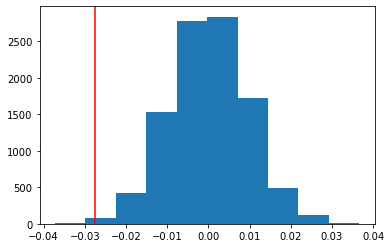

In [23]:
#Simulate the distribution under the null hypothesis
null_hypothesis = np.random.normal(0, differences.std(), differences.size)

plt.hist(null_hypothesis)

plt.axvline(diff, c= 'red')


### Hence we fail to reject the null hypothesis

In [24]:
# Compute the P-Value

(null_hypothesis>diff).mean()

0.9971